<a href="https://colab.research.google.com/github/wajeehafarooqi/DataScience-HousePriceProject/blob/Exploratory-Data-Analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df_hp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-HousePricePreiction/house-price-prediction/train.csv')

In [ ]:
df_hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_hp.shape

(1460, 81)

In [5]:
df_hp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Missing Values in Data

In [6]:
features_na = [features for features in df_hp.columns if df_hp[features].isnull().sum()>1]
for i in features_na:
  print(i,np.round(df_hp[i].isnull().mean(),4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.0055 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


# Categorical Variables

In [54]:
categorical_features = [feature for feature in df_hp.columns if df_hp[feature].dtypes=='O']

In [55]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_hp[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

# Numerical Data 

In [7]:
numerical_features = [feature for feature in df_hp.columns if df_hp[feature].dtypes=='int64' ]
numerical_features

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Float Data

In [8]:
discrete_features=[feature for feature in df_hp.columns if  df_hp[feature].dtypes=='float64']
discrete_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Temporal Data

In [9]:
year_feature1 = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature2 = [feature for feature in discrete_features if 'Yr' in feature or 'Year' in feature]
year_feature =[year_feature1 + year_feature2]
year_feature

[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']]

# Visualisation

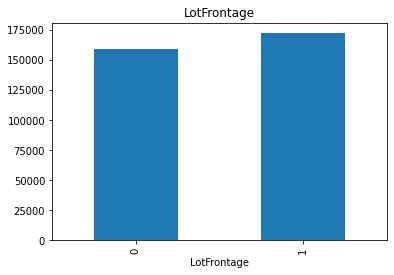

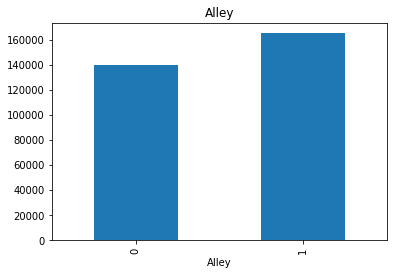

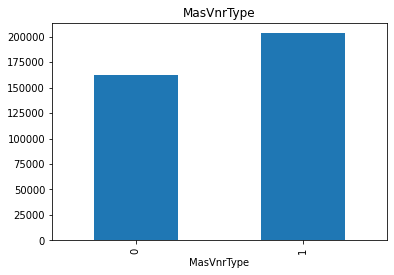

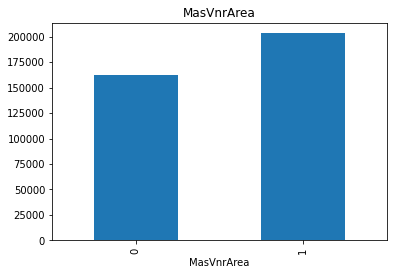

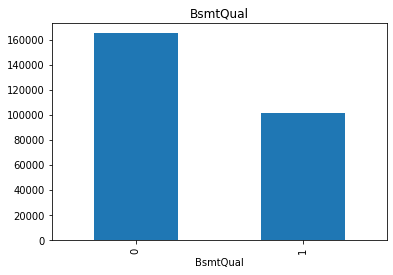

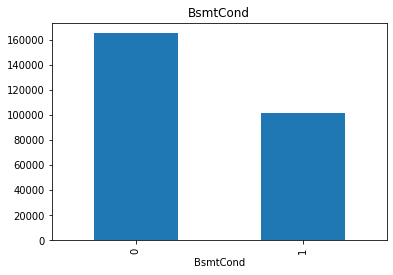

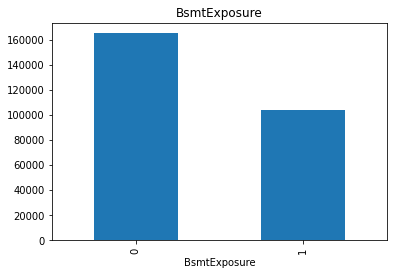

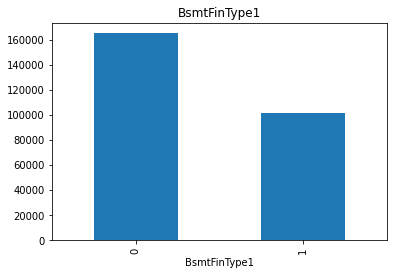

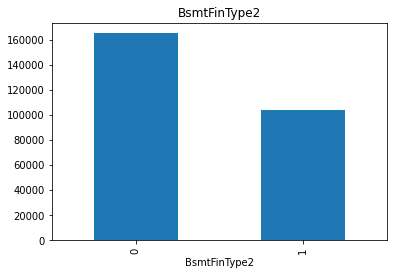

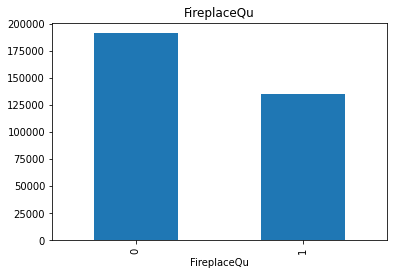

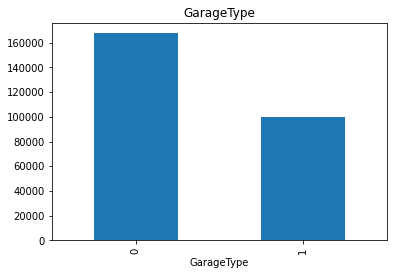

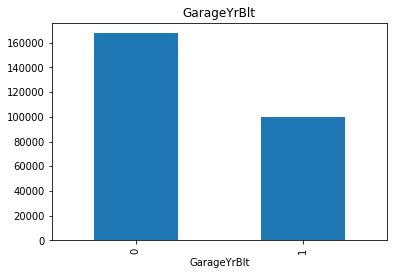

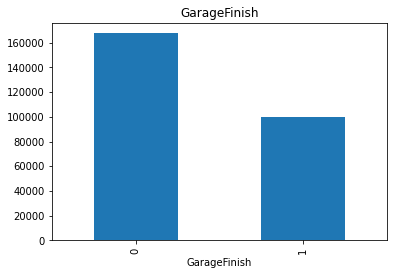

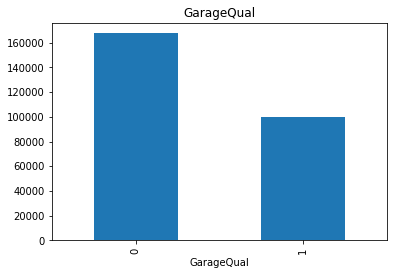

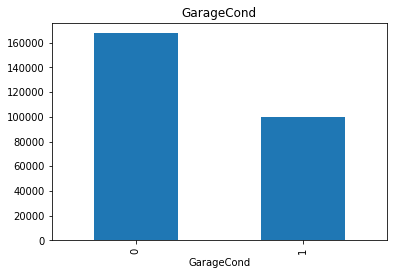

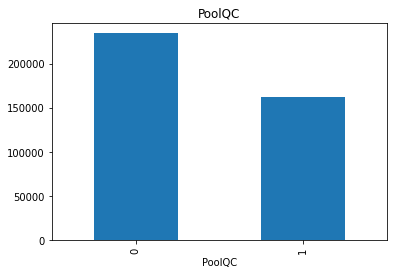

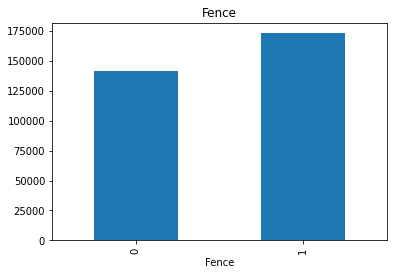

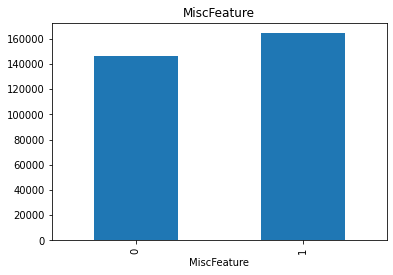

In [13]:
# Missing data
for feature in features_na:
    data = df_hp.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

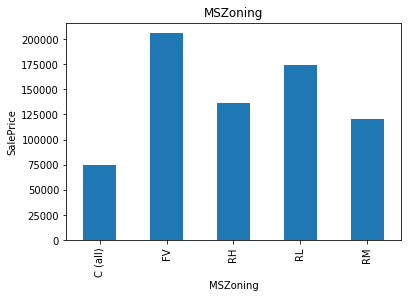

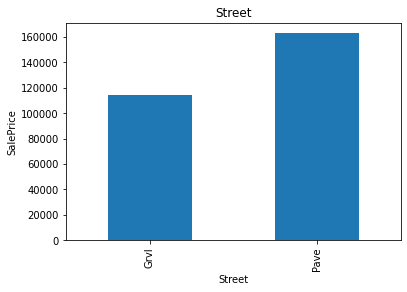

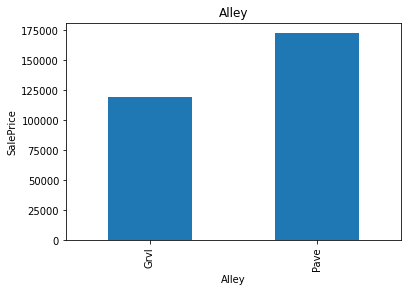

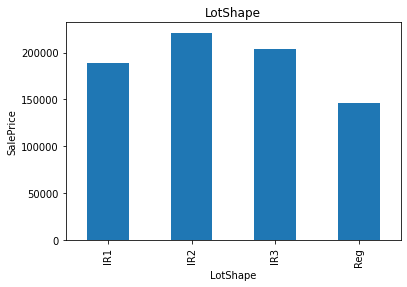

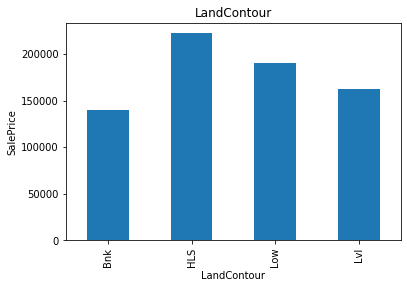

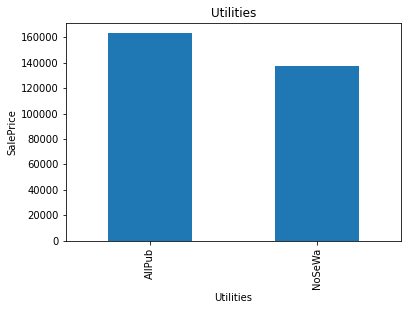

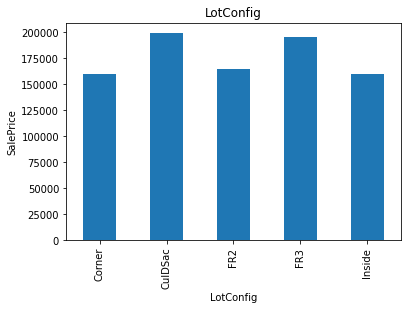

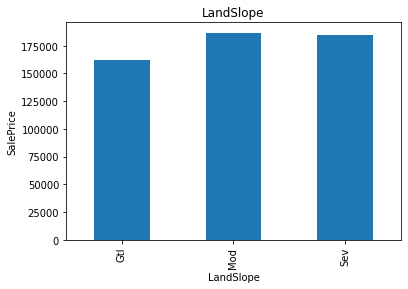

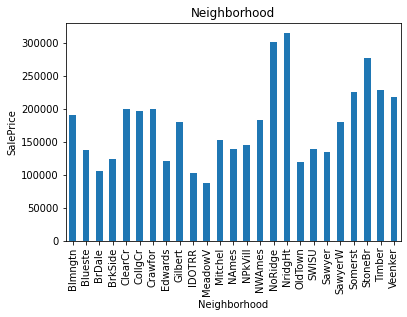

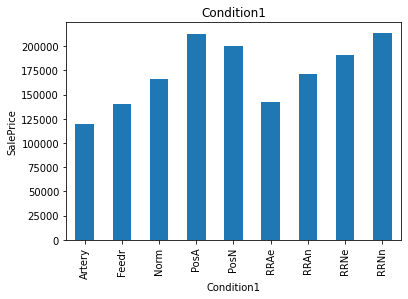

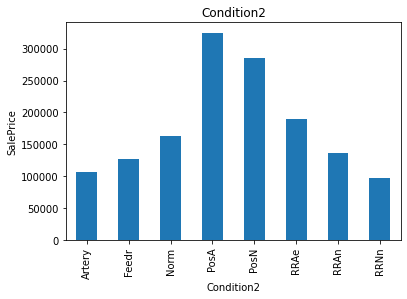

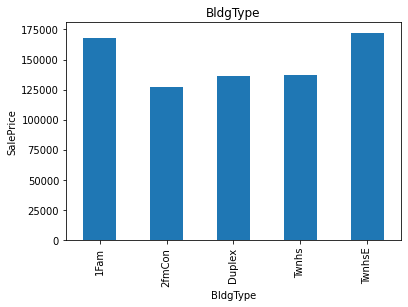

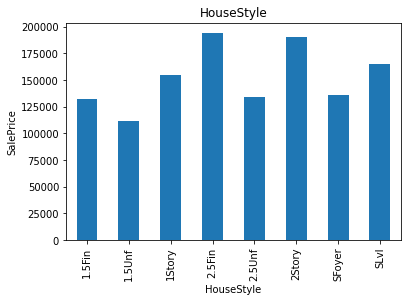

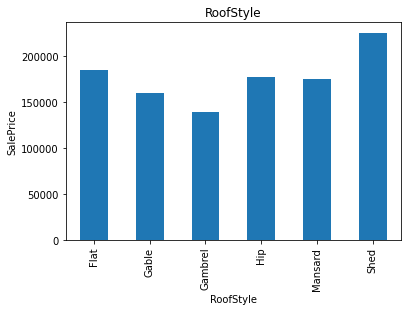

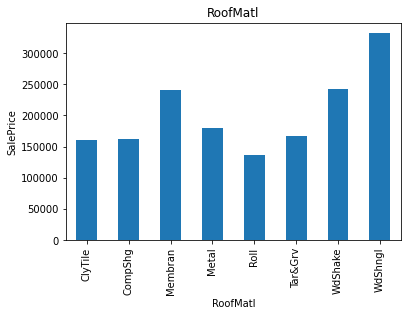

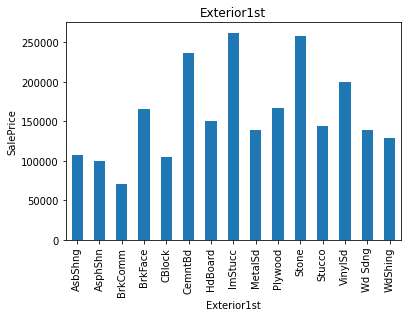

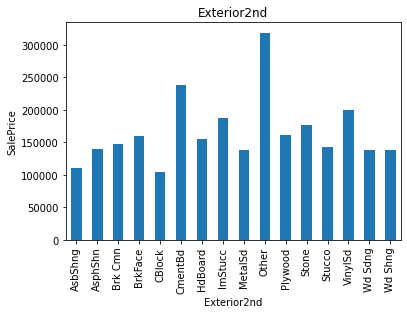

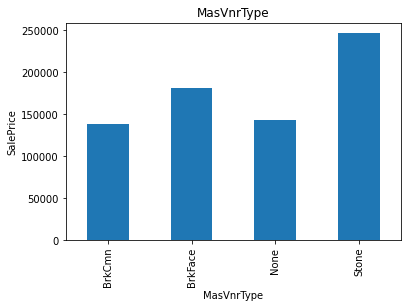

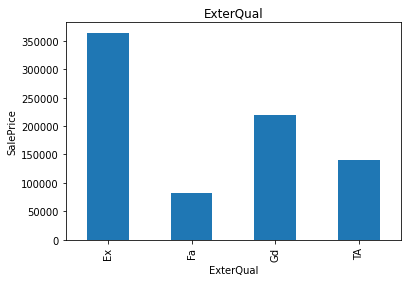

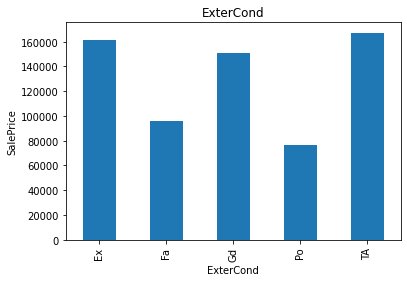

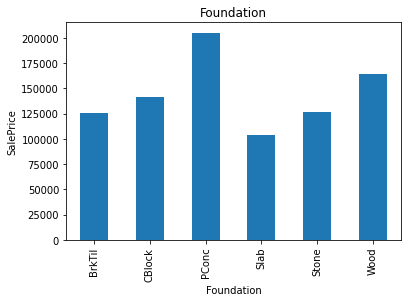

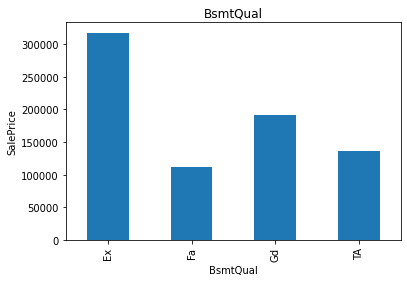

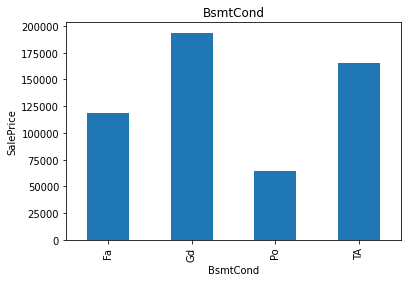

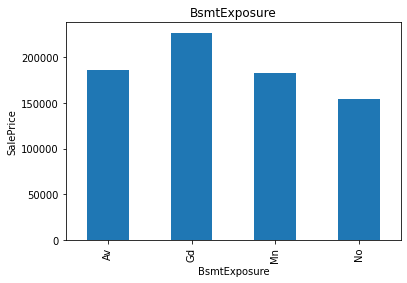

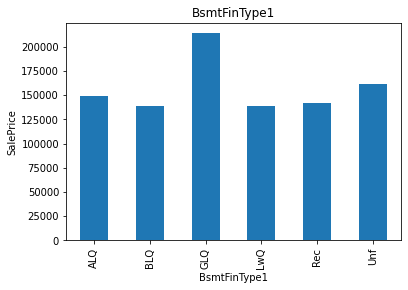

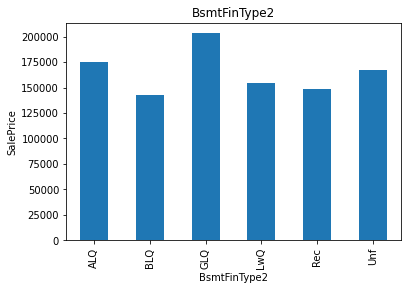

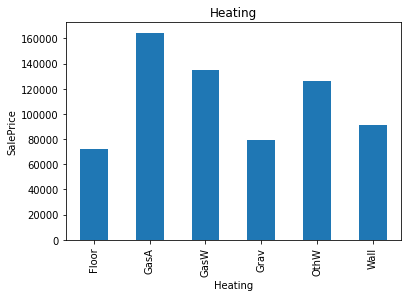

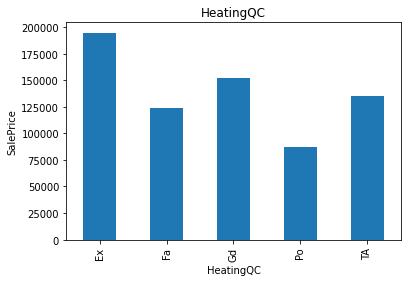

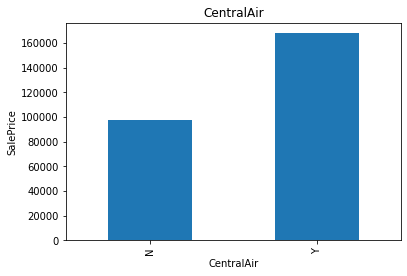

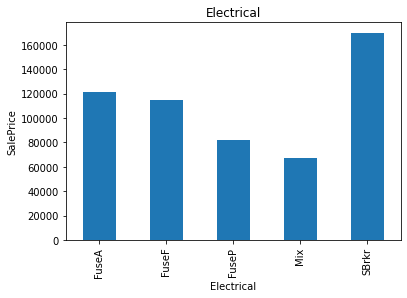

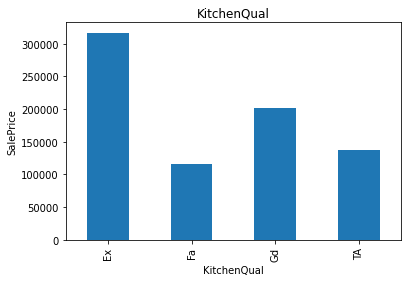

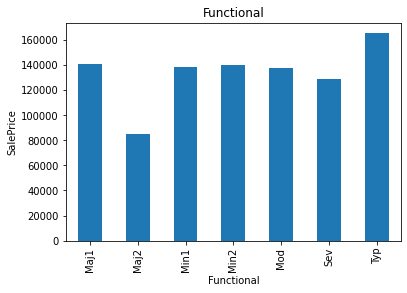

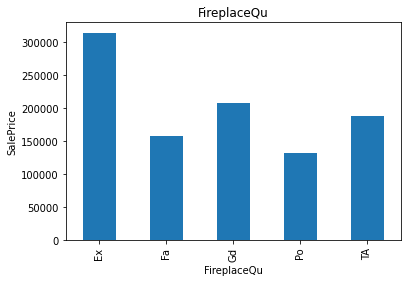

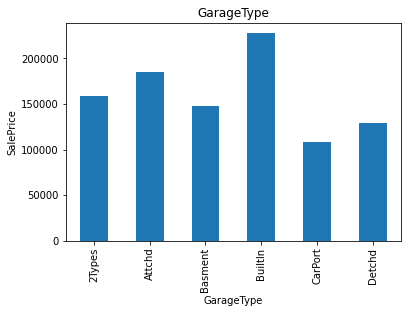

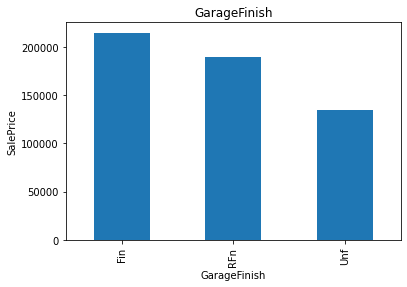

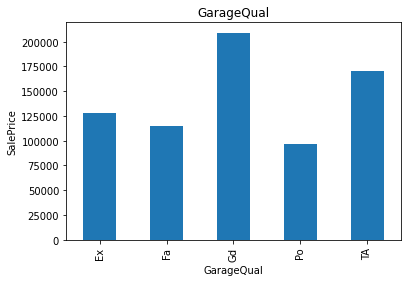

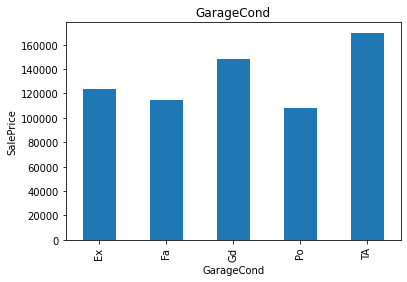

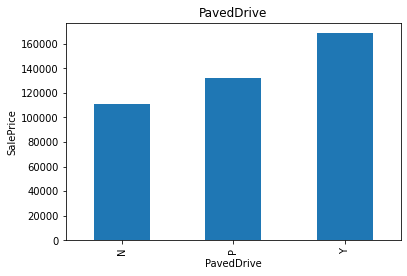

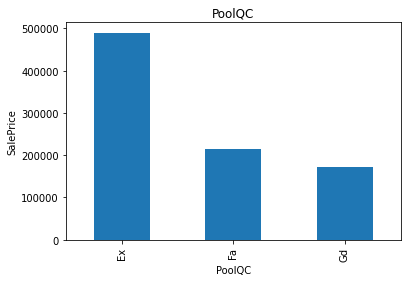

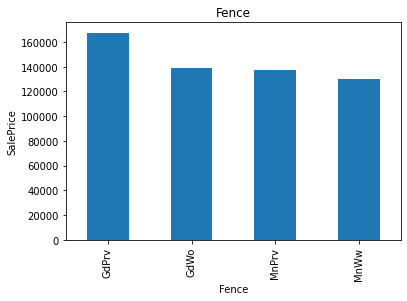

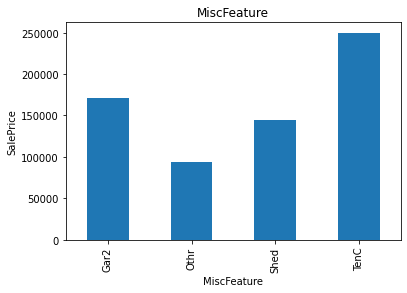

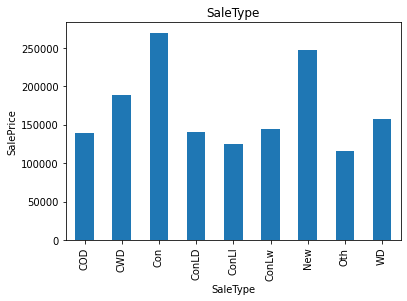

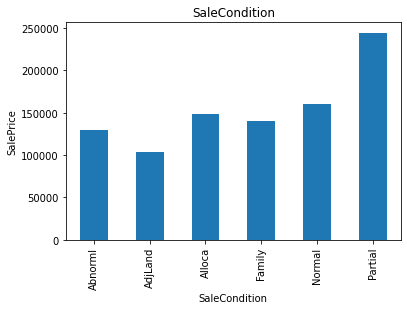

In [56]:
#find out relatioship between categorical and dependent feature
for feature in categorical_features:
    data=df_hp.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


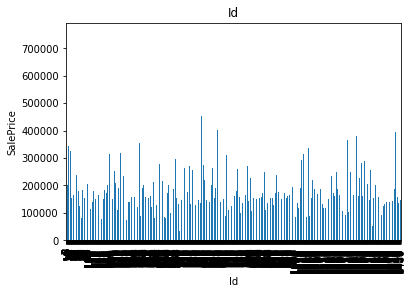

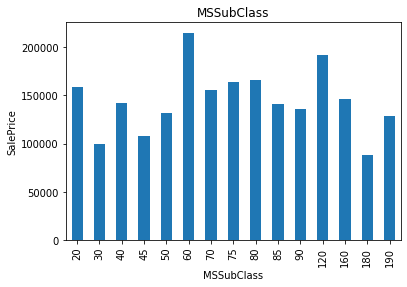

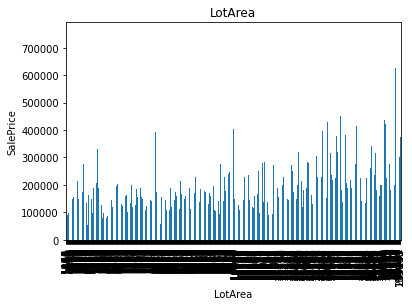

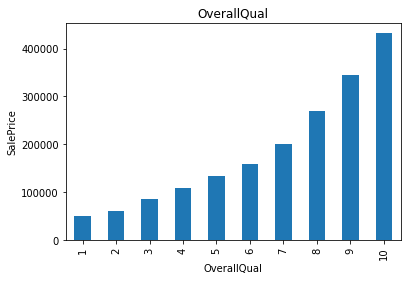

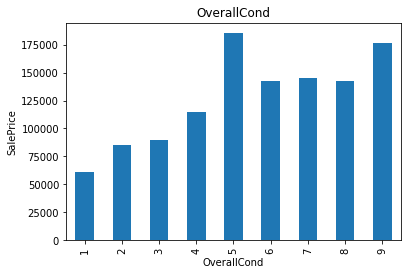

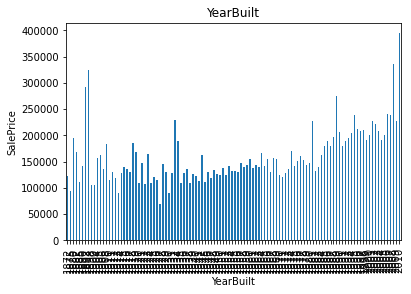

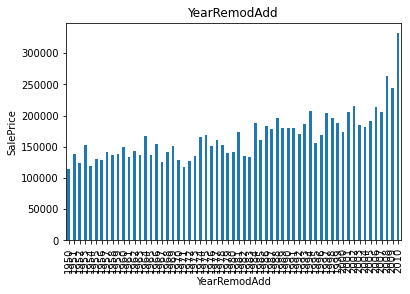

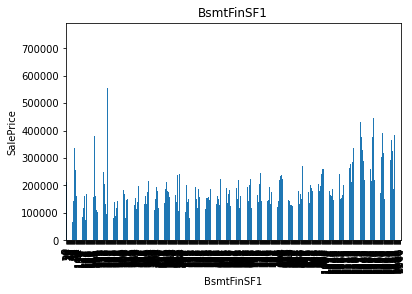

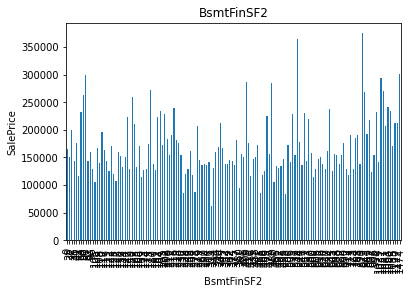

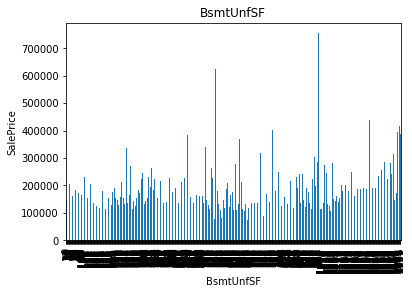

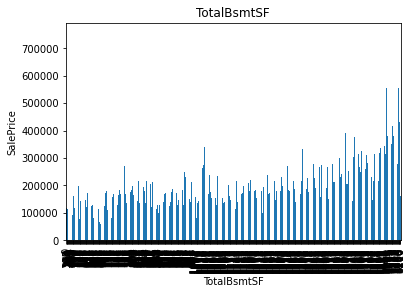

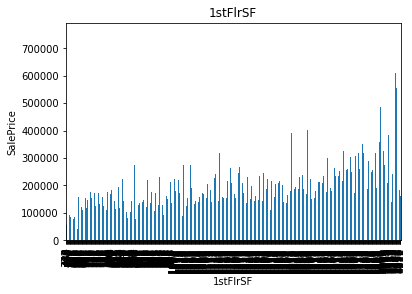

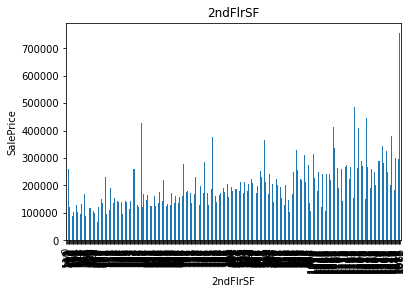

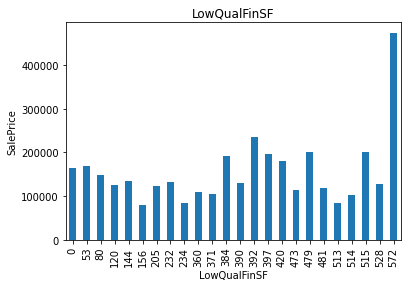

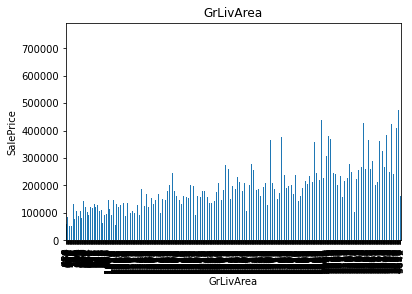

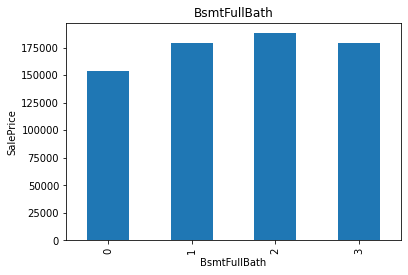

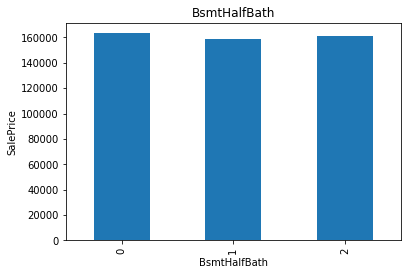

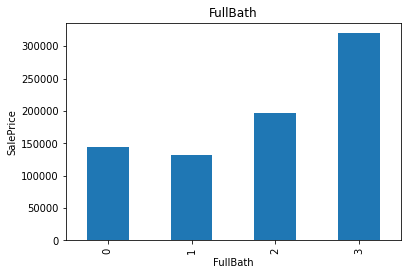

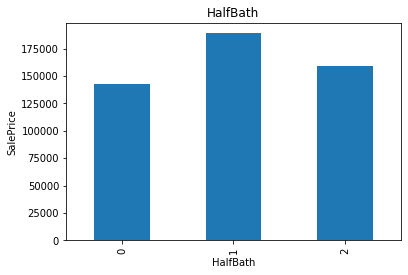

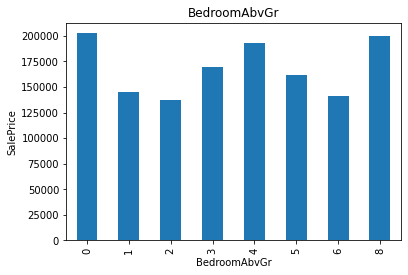

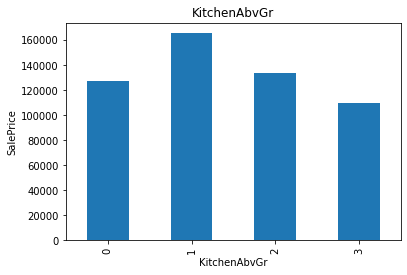

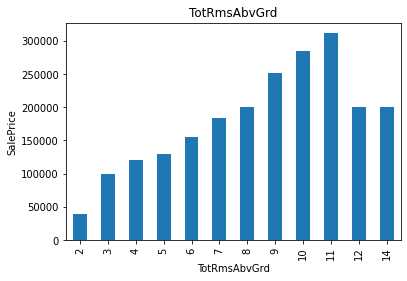

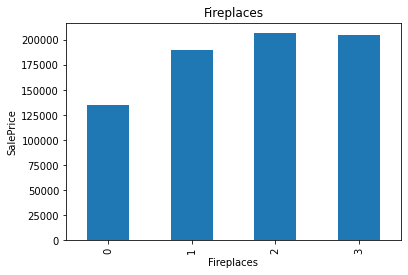

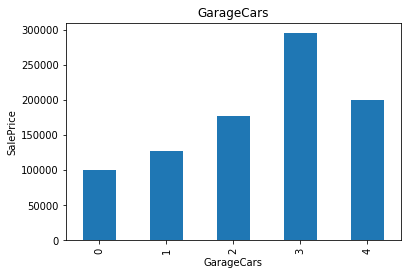

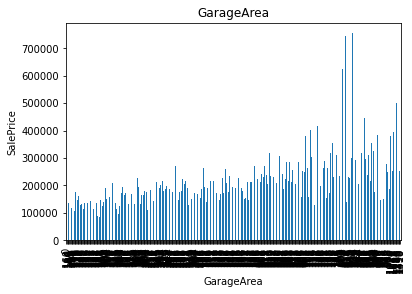

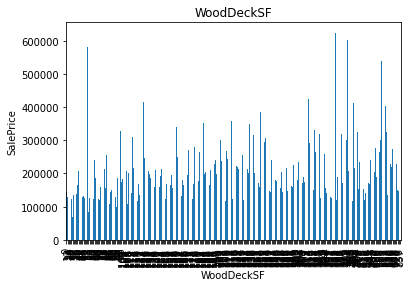

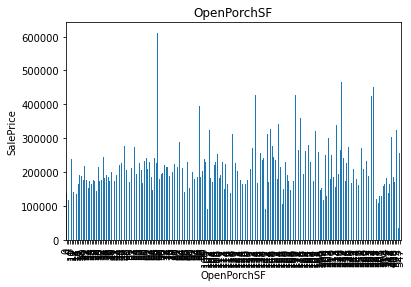

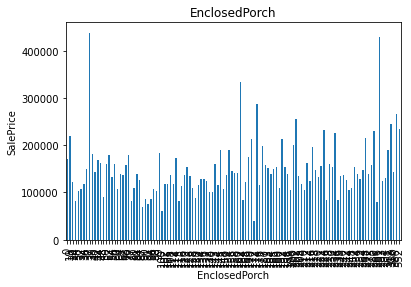

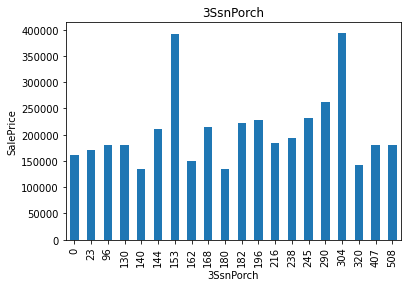

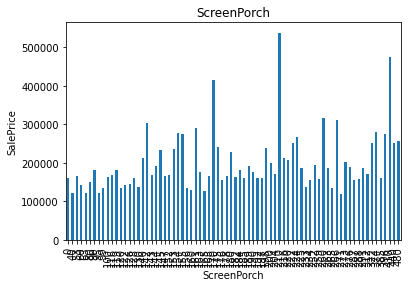

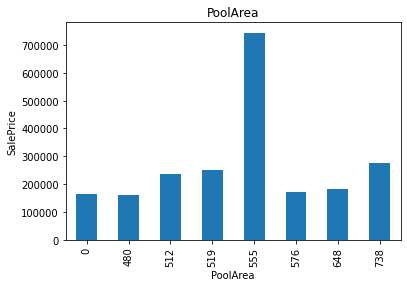

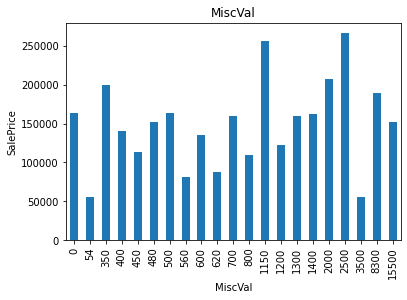

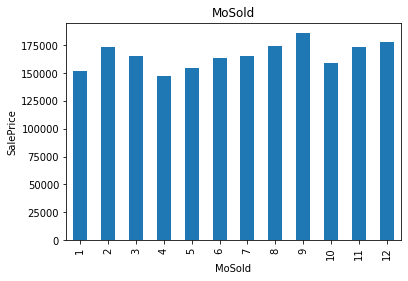

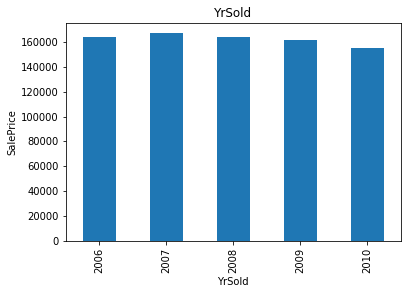

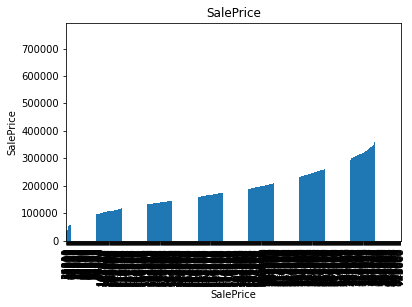

In [14]:
## Lets Find the realtionship between Numerical data and Sale PRice

for feature in numerical_features:
    data=df_hp.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

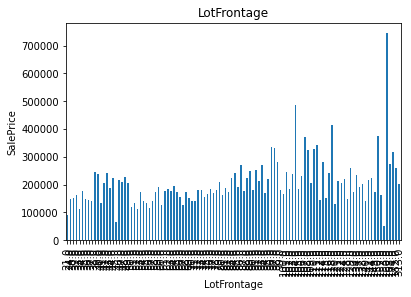

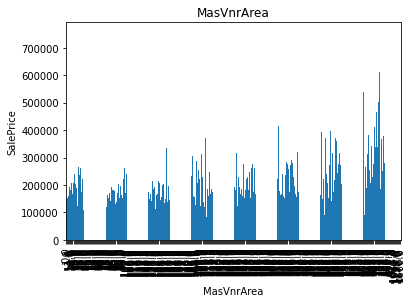

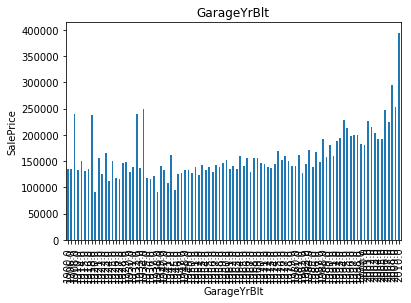

In [15]:
## Lets Find the realtionship between discrete and Sale PRice

for feature in discrete_features:
    data=df_hp.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'House Price vs YearSold')

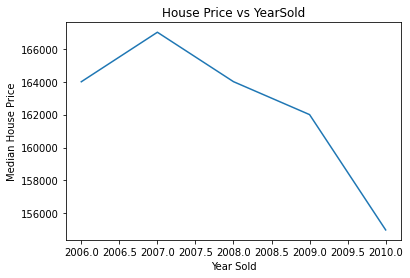

In [17]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df_hp.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

## Distribution of data:
 here we can analyse that the data is skewed either left or right for that in feature engineering we will use log transformation on that data

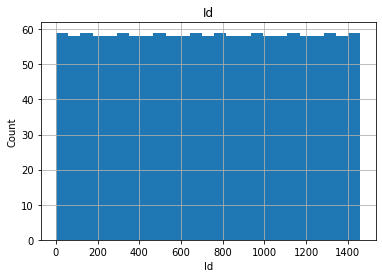

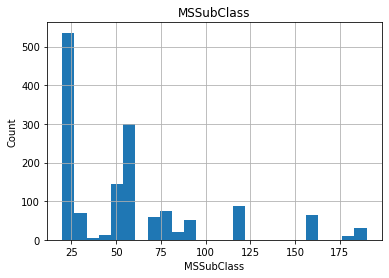

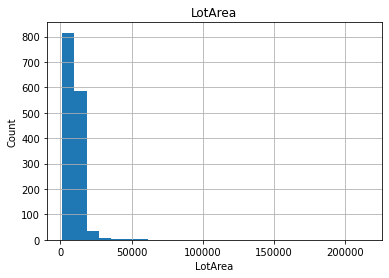

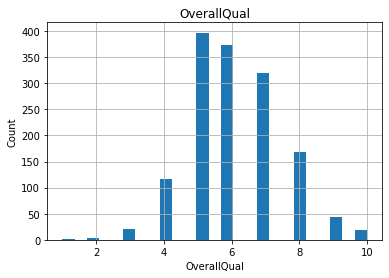

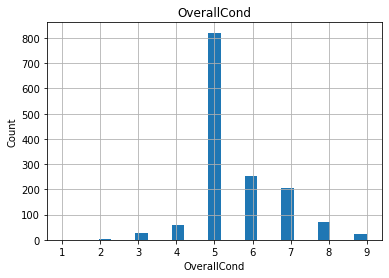

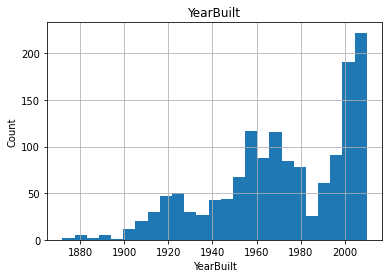

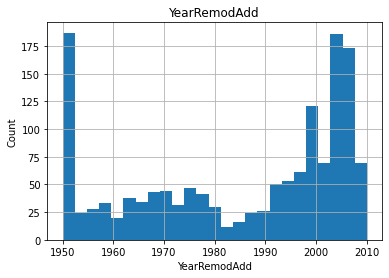

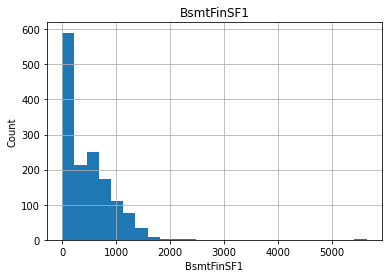

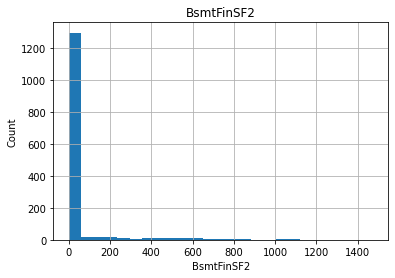

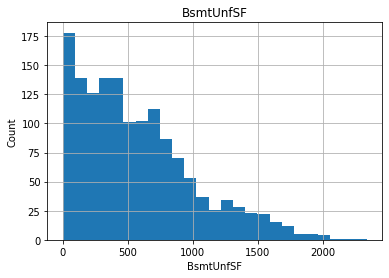

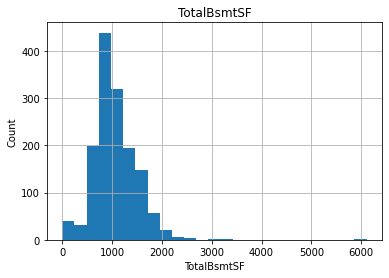

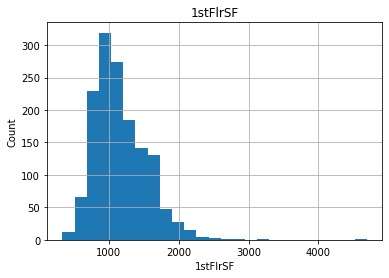

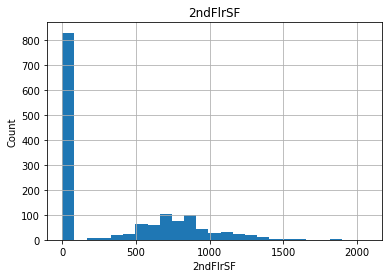

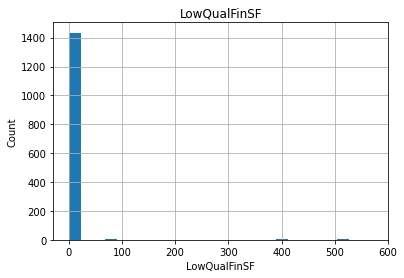

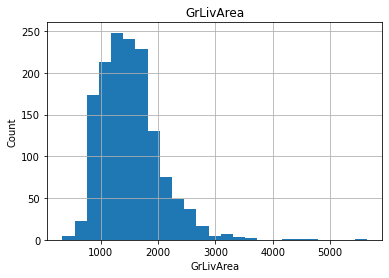

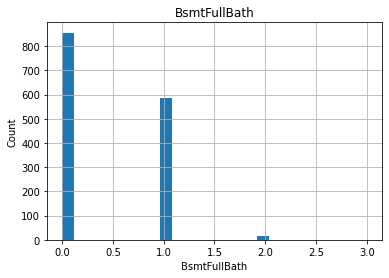

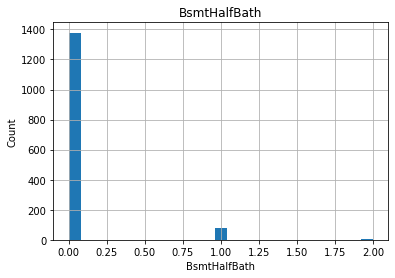

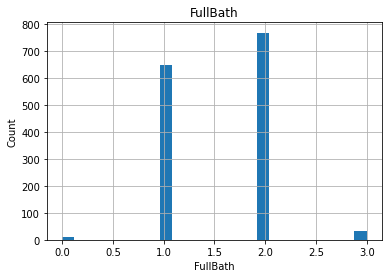

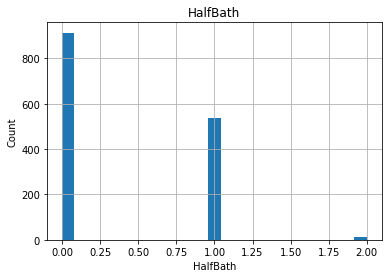

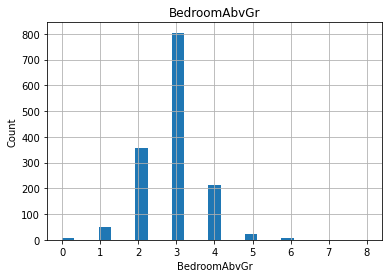

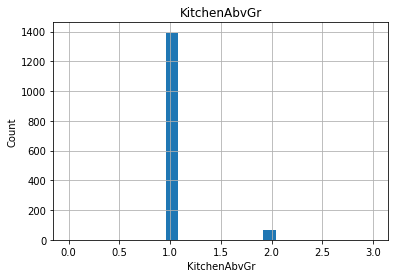

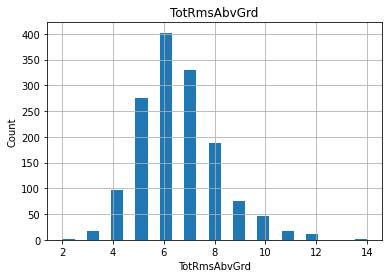

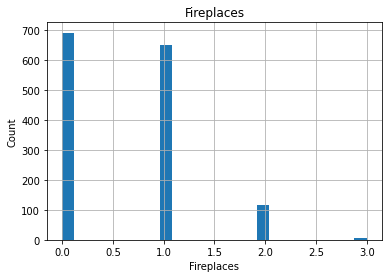

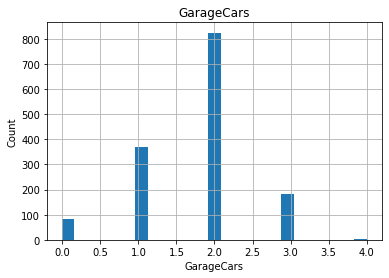

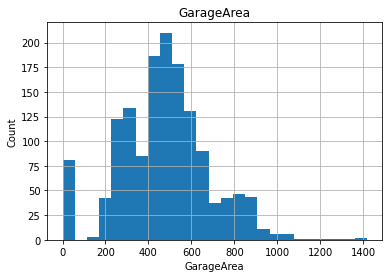

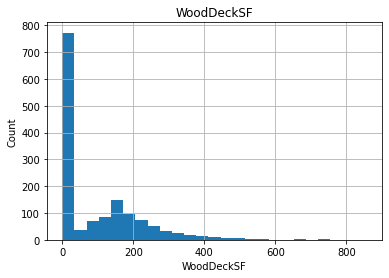

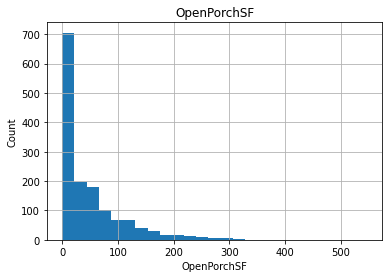

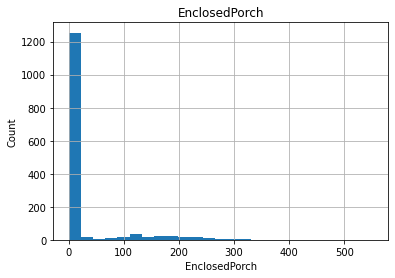

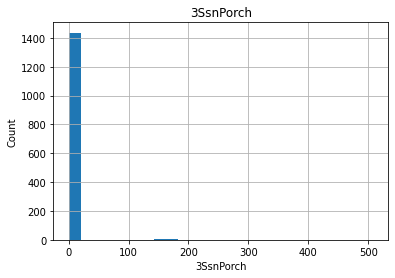

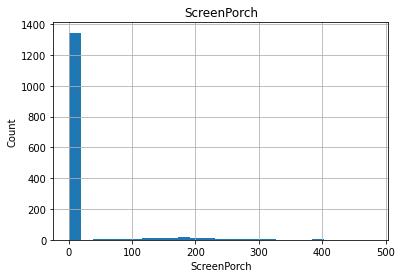

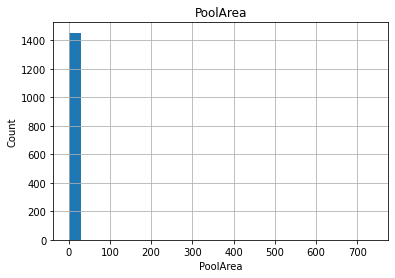

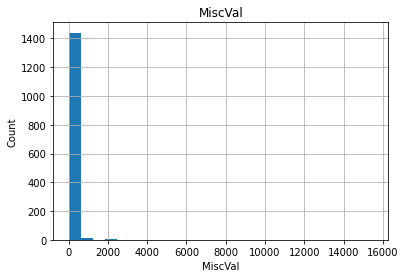

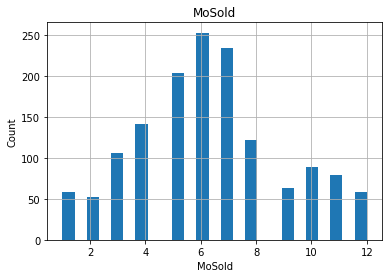

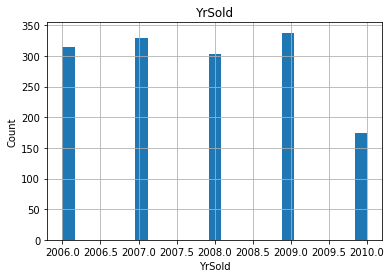

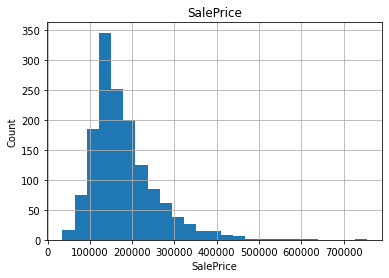

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in numerical_features:
    data=df_hp.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [20]:
len(numerical_features)

35

In [26]:
year_feature

[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']]

In [47]:
numerical_feature2=[feature for feature in numerical_features if len(df_hp[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(numerical_feature2)))

Discrete Variables Count: 18


In [48]:
numerical_feature2

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [49]:
# as we don't need id and year features in our numerical data after checking the numerical data we are going to apply log for rest of data that is not unique
#now numerical data is continous data
continous_feature =[feature for feature in numerical_features if feature not in numerical_feature2+year_feature+['Id']]
print(len(continous_feature))

16


In [50]:
continous_feature

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

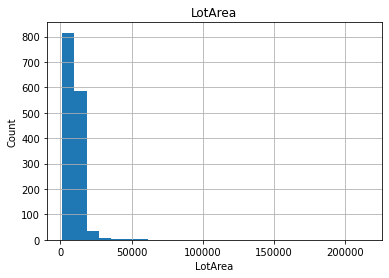

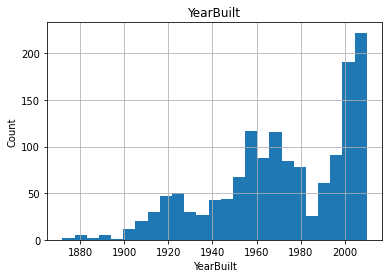

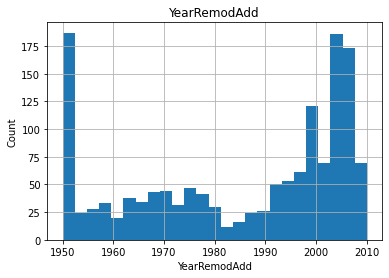

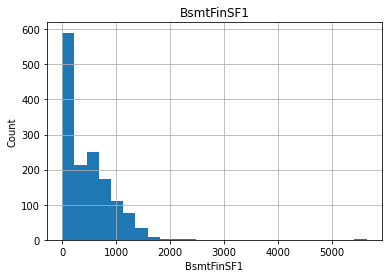

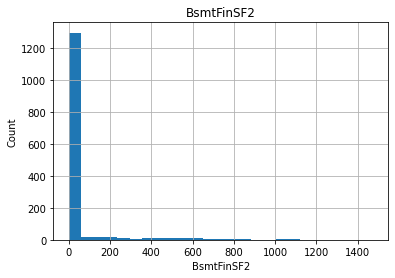

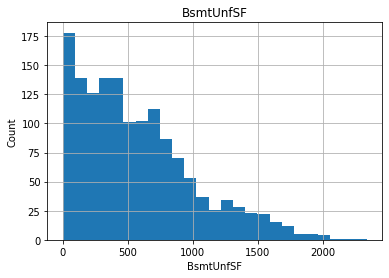

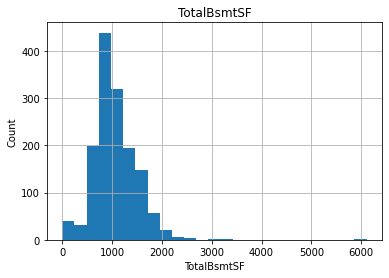

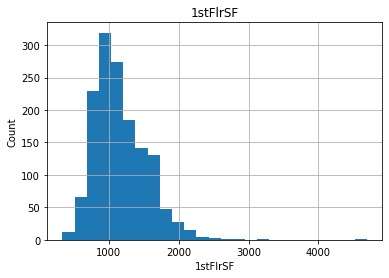

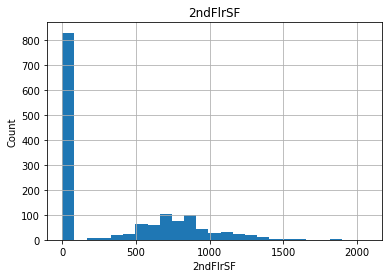

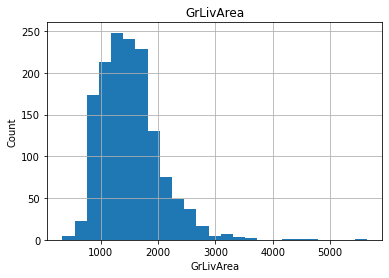

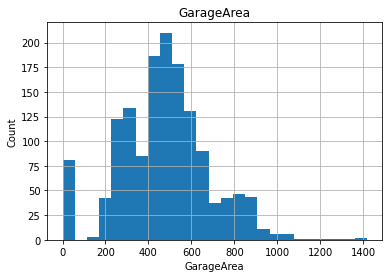

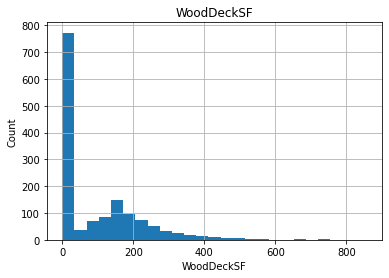

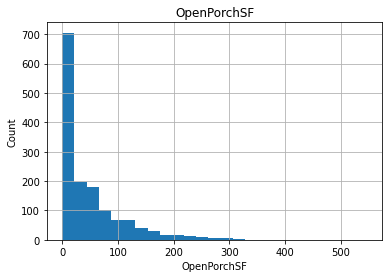

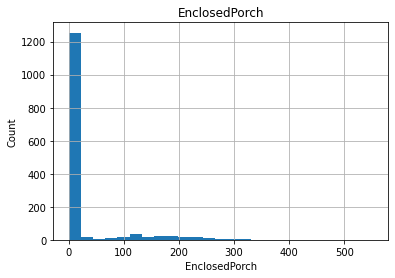

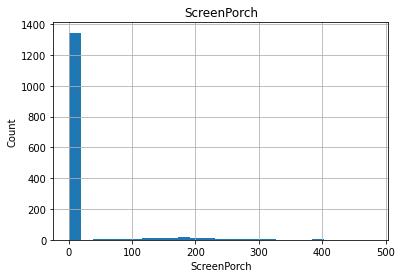

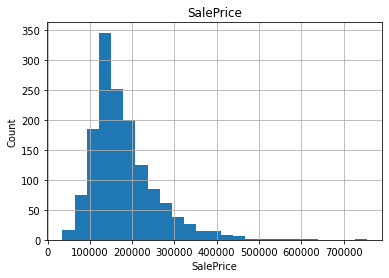

In [51]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continous_feature:
    data=df_hp.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

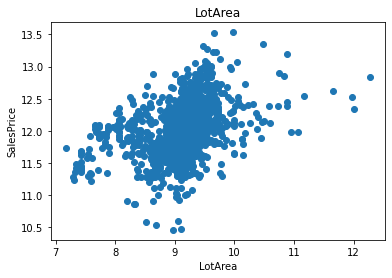

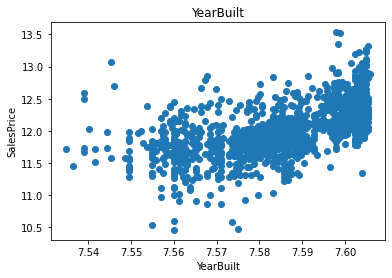

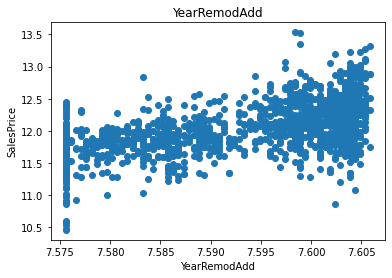

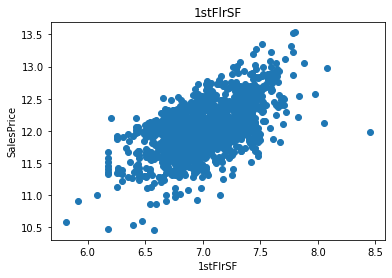

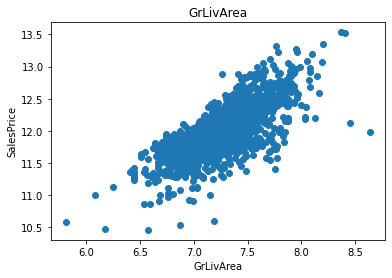

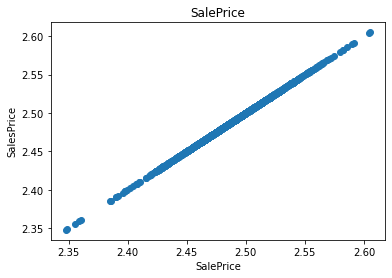

In [52]:
## We will be using logarithmic transformation


for feature in continous_feature:
    data=df_hp.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

# OUTLIER

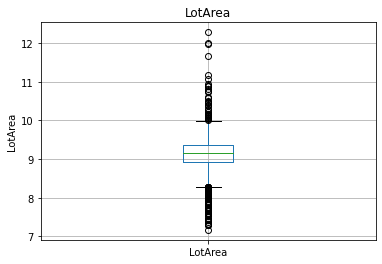

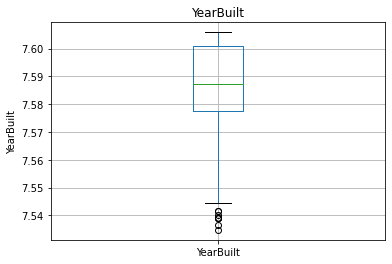

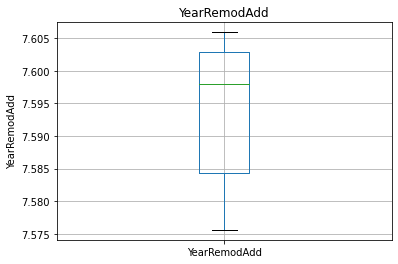

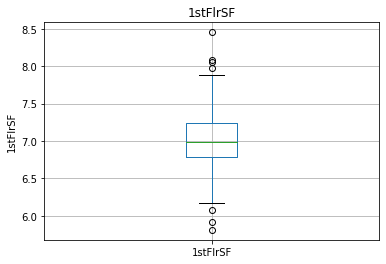

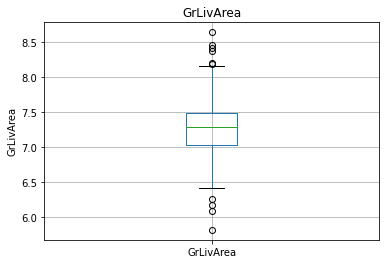

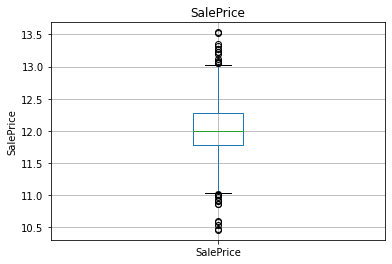

In [53]:
for feature in continous_feature:
    data=df_hp.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()